# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

# Loading the raw data

In [2]:
car_data = pd.read_csv("car_price_data1.csv")

In [3]:
car_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
car_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
# Information of the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


### Drop features that are not required to build our model

In [6]:

df = car_data.drop(labels='Model', axis=1)

### Check for any missing value in data set and treat it

In [7]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
# df_no_mv = df.dropna()

In [9]:
df['Price'] = df['Price'].interpolate(method='linear')

In [10]:
df['EngineV'] = df['EngineV'].interpolate(method='linear')

In [11]:
df_no_mv=df

## Data exploration

#### Exploring the PDFs
The probability distribution will show us how that variable is distributed

Text(0.5, 1.0, 'Car Price Distribution Plot')

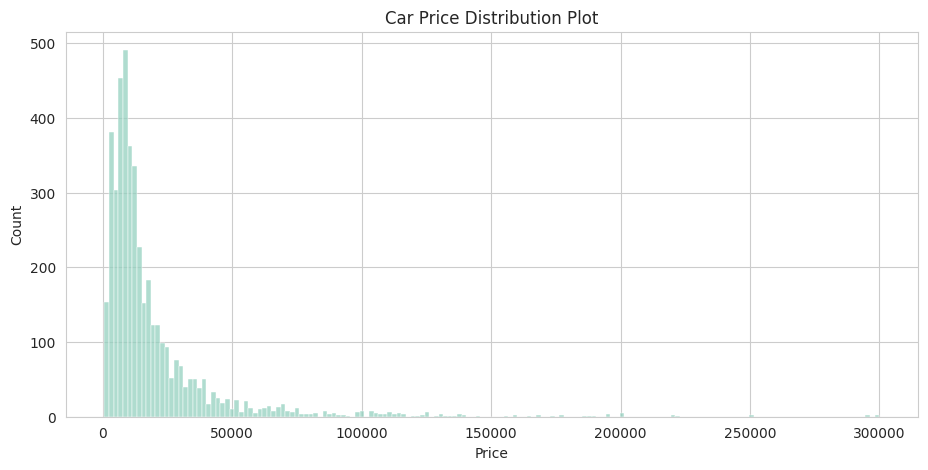

In [12]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.histplot(df_no_mv['Price'])
plt.title('Car Price Distribution Plot')

<ipython-input-13-00a383362299>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['Year'])
<ipython-input-13-00a383362299>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['Mileage'])
<ipython-input-13-00a383362299>:12: UserWarning: 

`distplot` is a deprecated function and will

Text(0.5, 1.0, 'EngineV Distribution Plot')

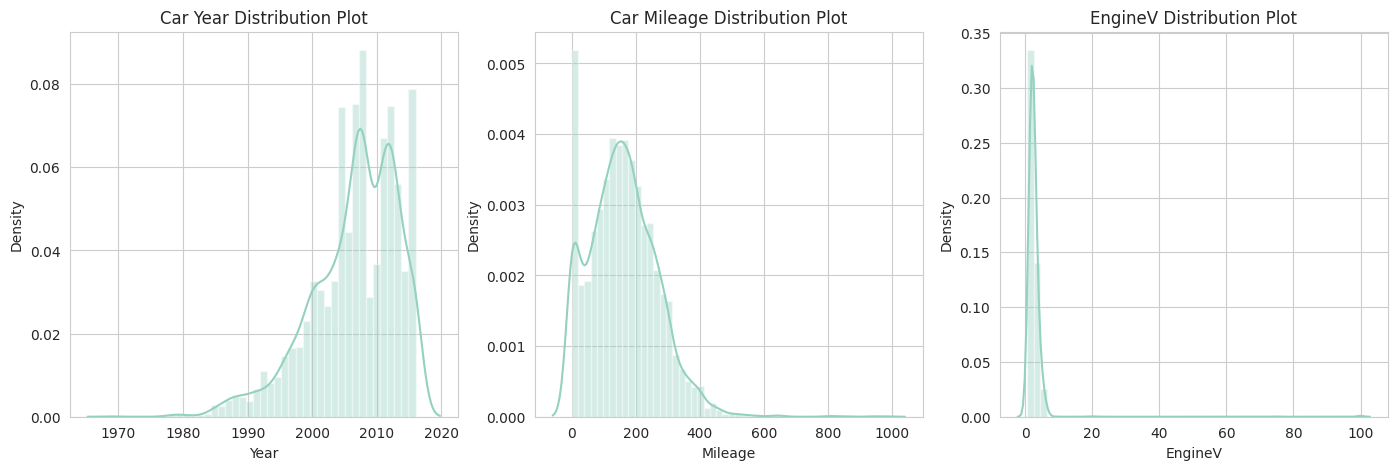

In [13]:
# car and mileage Distribution Plot
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(df_no_mv['Year'])
plt.title('Car Year Distribution Plot')

plt.subplot(1,3,2)
sns.distplot(df_no_mv['Mileage'])
plt.title('Car Mileage Distribution Plot')

plt.subplot(1,3,3)
sns.distplot(df_no_mv['EngineV'])
plt.title('EngineV Distribution Plot')

### Dealing with outliers

In [14]:
# variable q that will be equal to the 99th percentile of the 'Price' variable
q = df_no_mv['Price'].quantile(0.99)

data_1 = df_no_mv[df_no_mv['Price']<q]

<ipython-input-15-b72c98a6f464>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


Text(0.5, 1.0, 'Car Price Distribution Plot')

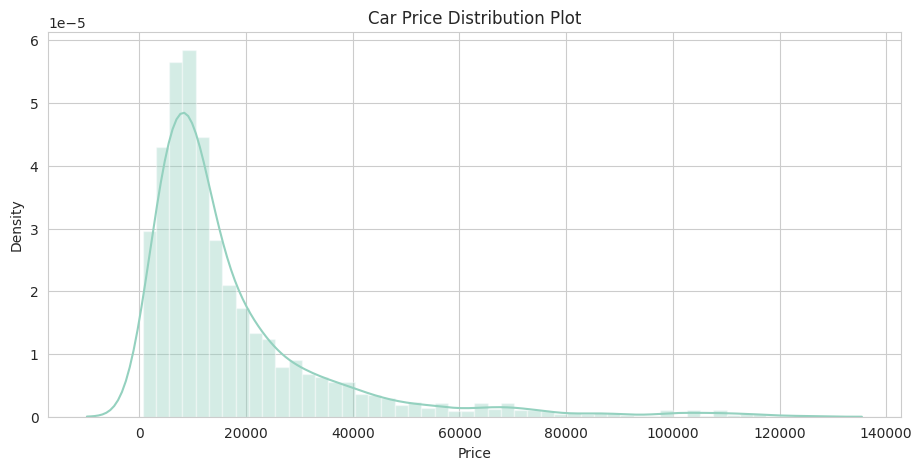

In [15]:

plt.figure(figsize=[11,5])
sns.distplot(data_1['Price'])
plt.title('Car Price Distribution Plot')

However, there are much fewer outliers

 * Mileage Column

<ipython-input-16-9a0d00944d22>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['Mileage'])


Text(0.5, 1.0, 'Car Mileage Distribution Plot')

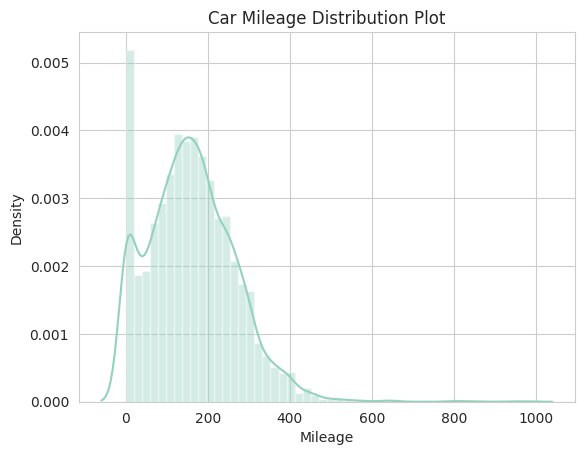

In [16]:
sns.distplot(df_no_mv['Mileage'])
plt.title('Car Mileage Distribution Plot')

In [17]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<ipython-input-18-58baab269f56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

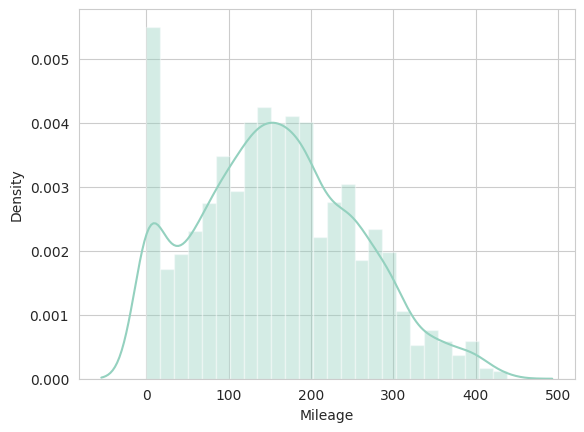

In [18]:
sns.distplot(data_2['Mileage'])

* Year Column

<ipython-input-19-53f1dbc36130>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['Year'])


<Axes: xlabel='Year', ylabel='Density'>

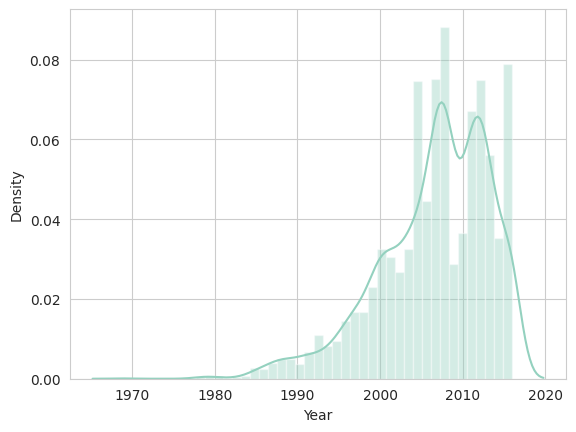

In [19]:

sns.distplot(df_no_mv['Year'])

In [20]:
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

<ipython-input-21-89784abcafb6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['Year'])


<Axes: xlabel='Year', ylabel='Density'>

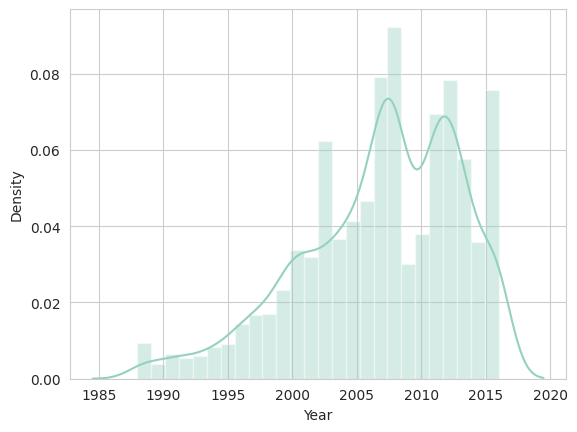

In [21]:
sns.distplot(data_3['Year'])

* EngineV Column

<ipython-input-22-e3e90be410ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['EngineV'])


Text(0.5, 1.0, 'EngineV Distribution Plot')

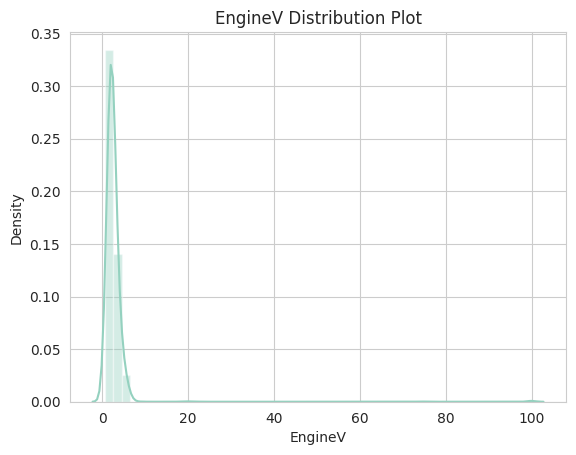

In [22]:

sns.distplot(df_no_mv['EngineV'])
plt.title('EngineV Distribution Plot')

In [23]:

data_4 = data_3[data_3['EngineV']<6.5]

<ipython-input-24-d9a495c61f8d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

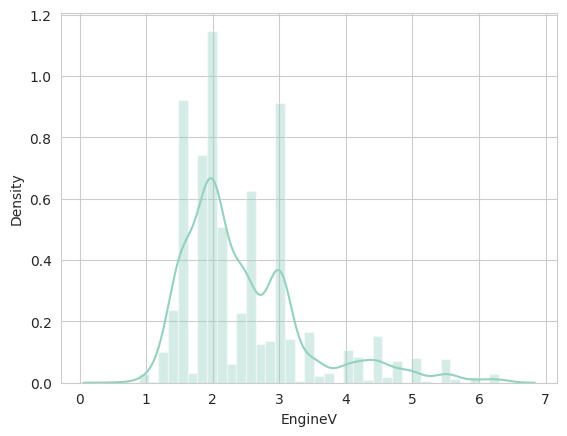

In [24]:

sns.distplot(data_4['EngineV'])

In [25]:

cleaned_data = data_4.reset_index(drop=True)

In [26]:

cleaned_data.describe()

,Price,Mileage,EngineV,Year
count,4172.000000,4172.000000,4172.000000,4172.000000
mean,18000.511117,157.843001,2.464395,2006.862656
std,18642.699865,96.875300,0.945857,6.145801
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,87.000000,1.800000,2003.000000
50%,11600.000000,154.500000,2.200000,2008.000000
75%,21500.000000,223.250000,3.000000,2012.000000
max,124999.000000,438.000000,6.300000,2016.000000


## checking the linearity using a scatter plot

Text(0.5, 1.0, 'Price and EngineV')

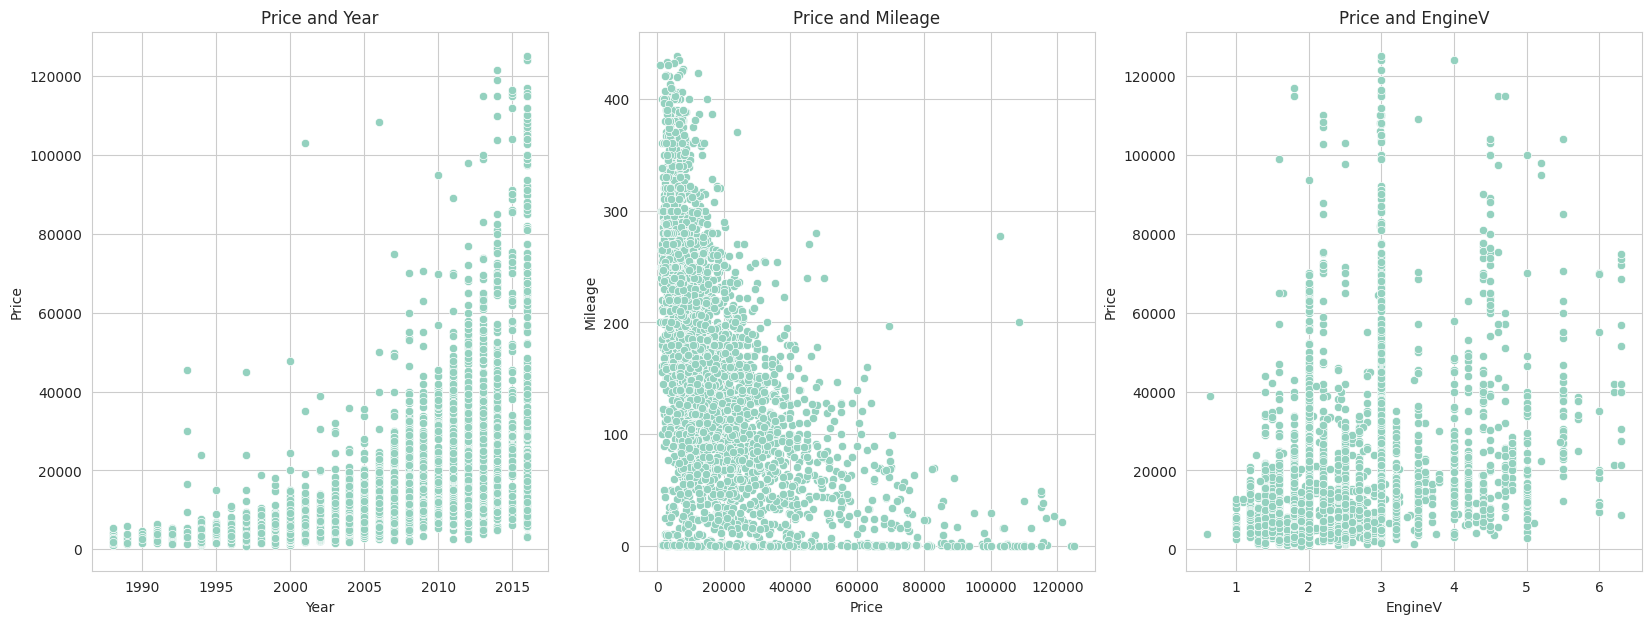

In [27]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='Year',y='Price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sns.scatterplot(x='Price',y='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='Price',x='EngineV',data=cleaned_data)
plt.title("Price and EngineV")

we can spot patterns but not perfect linear once.

<ipython-input-28-17bfed50433e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

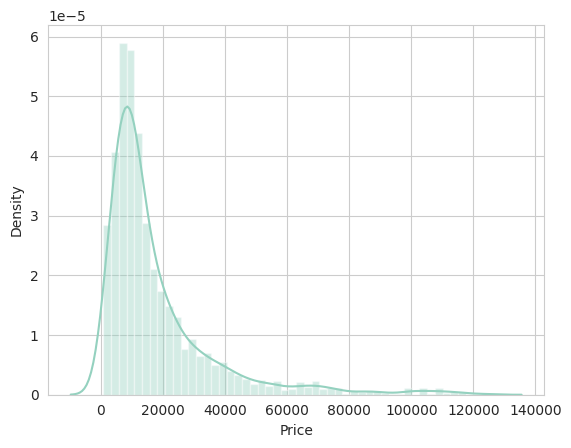

In [28]:

sns.distplot(cleaned_data['Price'])

## transform 'Price' with a log transformation

In [29]:

log_price = np.log(cleaned_data['Price'])

cleaned_data['log_price'] = log_price
cleaned_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


Text(0.5, 1.0, 'Log price and EngineV')

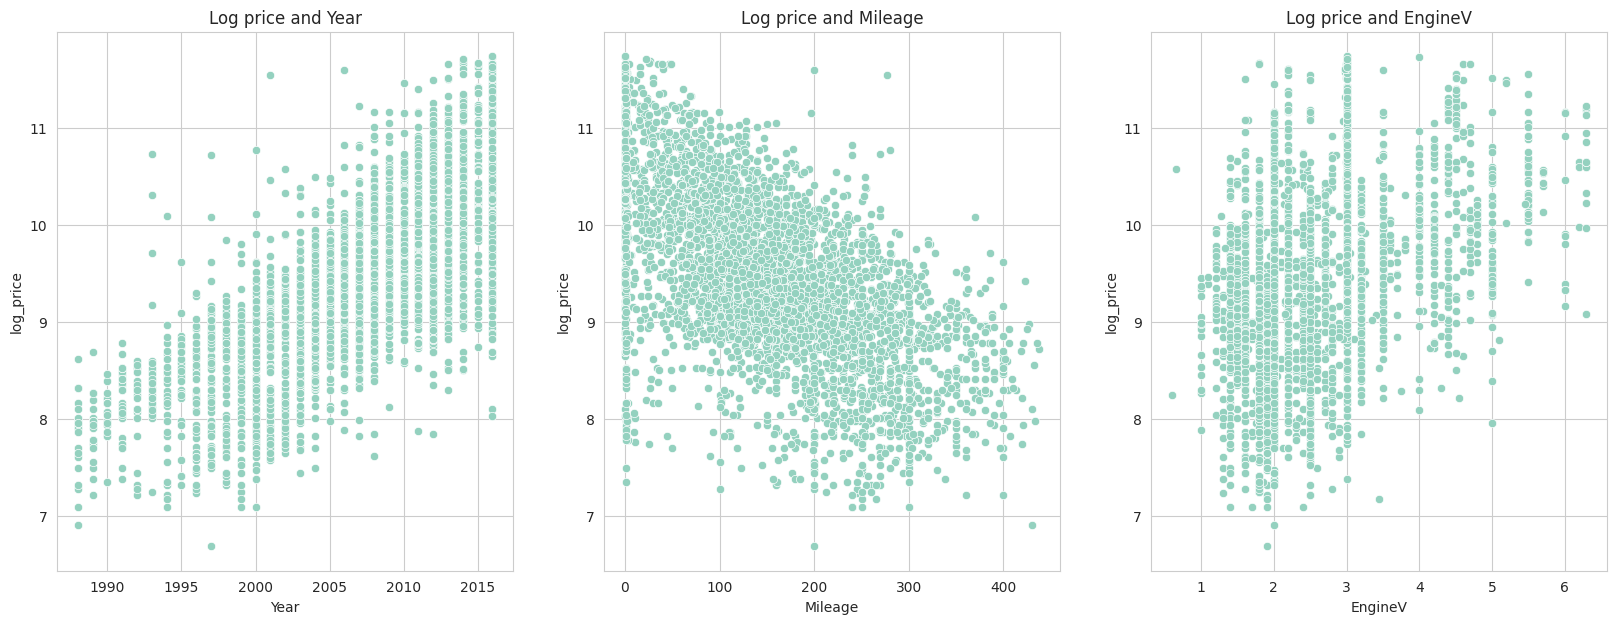

In [30]:

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Log price and Year")
sns.scatterplot(x='Year',y='log_price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Log price and Mileage")
sns.scatterplot(y='log_price',x='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='log_price',x='EngineV',data=cleaned_data)
plt.title("Log price and EngineV")



In [31]:
# we will be using the log price variable, we can drop the old 'Price' one
cleaned_data = cleaned_data.drop(['Price'],axis=1)

## Checking Multicollinearity Using VIF

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.630187,Mileage
1,10.579484,Year
2,7.792742,EngineV


*Fixing Multicollinearity:*

In [33]:

data_no_multicolinearity = cleaned_data.drop('Year',axis=1)

In [34]:
data_no_multicolinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


# Feature Selection

Feature selection simplified models, improves speed and prevent a series of unwanted issues arising from having many features

In [35]:
from sklearn.preprocessing import LabelEncoder
temp_data = data_no_multicolinearity.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])


print('\n--Correlated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['log_price'])).sort_values(ascending=False)[1:])


--Correlated Features with target variable--

Mileage         0.593116
Registration    0.457668
EngineV         0.390028
Body            0.375392
Brand           0.091655
Engine Type     0.020483
dtype: float64


In [36]:
temp_data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,1,3,277,2.0,3,1,8.342840
1,2,5,427,2.9,0,1,8.974618
2,2,3,358,5.0,1,1,9.495519
3,0,0,240,4.2,3,1,10.043249
4,5,0,120,2.0,3,1,9.814656


<Axes: >

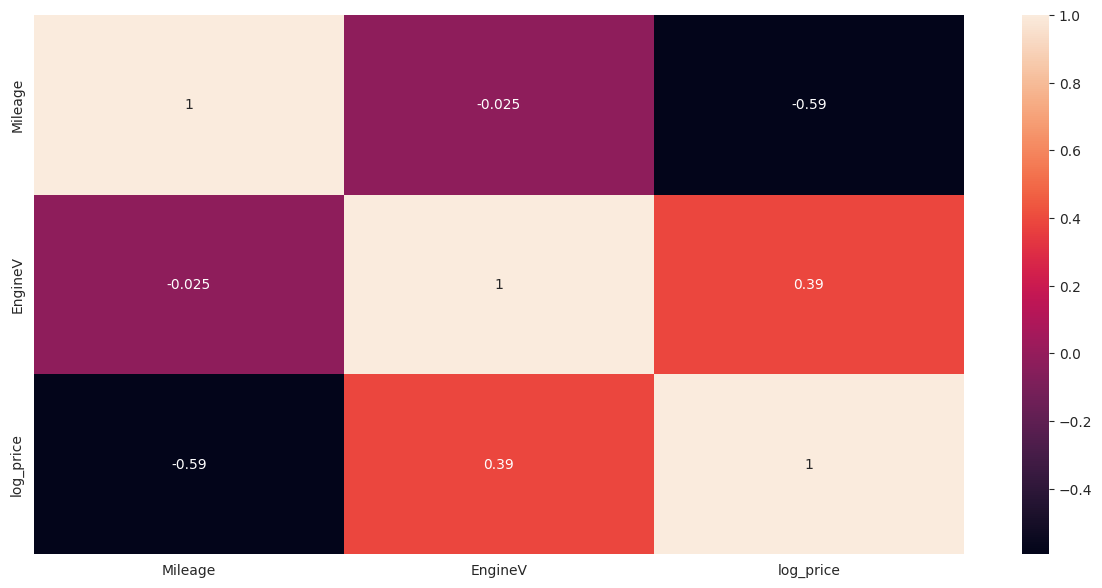

In [37]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

**Feature Importance**

*Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.*

In [38]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
X = temp_data.drop('log_price',axis=1)
y = temp_data['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

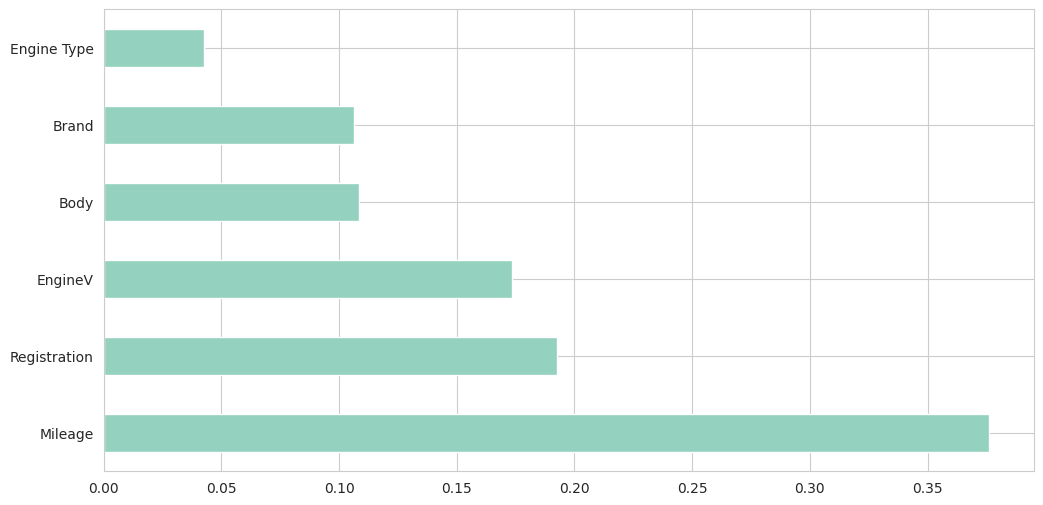

In [39]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [40]:
print(feat_importances.sort_values(ascending=False))

Mileage         0.376239
Registration    0.192708
EngineV         0.173664
Body            0.108454
Brand           0.106476
Engine Type     0.042459
dtype: float64


## Categorical Features

In [41]:
data_with_dummies = pd.get_dummies(data_no_multicolinearity,drop_first=True)

In [42]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Model Development

### Declaring dependent and independent variable

In [43]:
x = data_with_dummies.drop('log_price',axis=1)
y = data_with_dummies['log_price']

### Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[['Mileage','EngineV']])

StandardScaler()

In [45]:

inputs_scaled = scaler.transform(x[['Mileage','EngineV']])
scaled_data = pd.DataFrame(inputs_scaled,columns=['Mileage','EngineV'])

In [46]:
input_scaled2 =scaled_data.join(x.drop(['Mileage','EngineV'],axis=1))

In [47]:
input_scaled2.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,1.230151,-0.491037,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,2.778719,0.460596,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2.066378,2.681071,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0.848171,1.835176,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,-0.390683,-0.491037,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Training and Testing Data

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

# Linear Regression Model

In [49]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
lr_pred = lr.predict(x_test)

r_squared = r2_score(y_test,lr_pred)
rmse = np.sqrt(mean_squared_error(y_test,lr_pred))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.6773669484249422
RMSE : 0.510943047428214


In [50]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

MAE: 0.35562054270946786
MSE: 0.26106279771523005
RMSE: 0.510943047428214


# Random Forest Regressor Model

In [51]:
# Model Building
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Training Model
rf.fit(x_train,y_train)

# Model Summary
rf_pred = rf.predict(x_test)

r_squared = r2_score(y_test,rf_pred)
rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.6540303978742872
RMSE : 0.529099117384874


In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

MAE: 0.3494921042953781
MSE: 0.27994587601745274
RMSE: 0.529099117384874


# GBT Regressor Model

In [53]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
gb_pred = gbt.predict(x_test)

r_squared = r2_score(y_test,gb_pred)
rmse = np.sqrt(mean_squared_error(y_test,gb_pred))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.6897045618892104
RMSE : 0.5010784915782412


In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, gb_pred))
print('MSE:', metrics.mean_squared_error(y_test, gb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gb_pred)))

MAE: 0.34813088462810643
MSE: 0.2510796547223256
RMSE: 0.5010784915782412


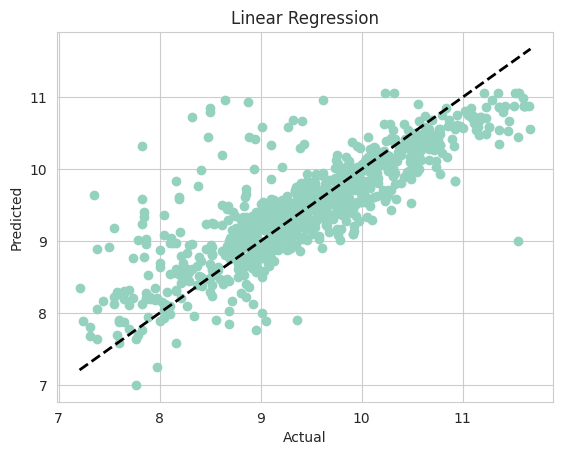

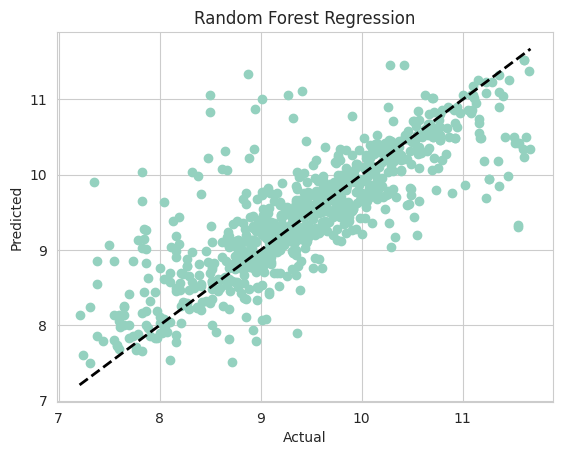

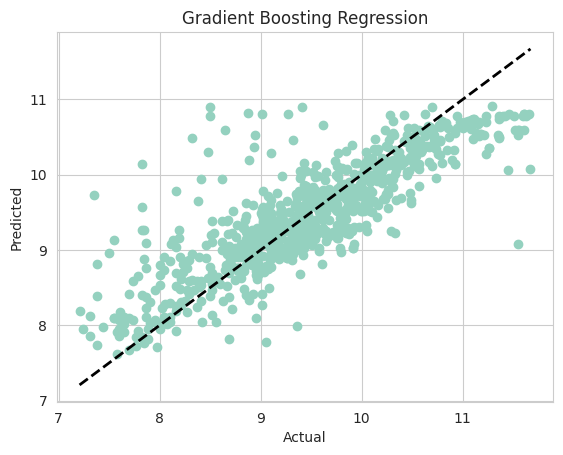

In [55]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values for Linear Regression
plt.scatter(y_test, lr_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

# Plot the predicted values against the actual values for Random Forest Regression
plt.scatter(y_test, rf_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')
plt.show()

# Plot the predicted values against the actual values for Gradient Boosting Regression
plt.scatter(y_test, gb_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regression')
plt.show()


# manually check these predictions

In [56]:

# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(gb_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(5)

,Predicted Price,Actual Price,Residual,Difference%
830,25010.27,14000.00,-11010.27,78.64
831,9244.87,12090.00,2845.13,23.53
832,10599.80,8950.00,-1649.80,18.43
833,7328.66,4700.00,-2628.66,55.93
834,40955.34,34900.00,-6055.34,17.35


In [57]:
# Choose the best model (in this case, Gradient Boosting Regression)
best_model = gbt

# Make predictions using the chosen model on new data
new_data = [[277,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1]]
predicted_price = best_model.predict(new_data)

print('Predicted price:', np.exp(predicted_price))

Predicted price: [7534.16179265]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
